# Customer Segmentation: Clustering

### 1.0 Data Preparation

##### 1.1 Data Collection

In [ ]:
# import package 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Testing from VSC

In [2]:
# import the data file as data
data = pd.read_csv('C:\\Users\\yew_k\\OneDrive\\Desktop\\CE301-Individual Capstone Project\\marketing_campaign.csv')

In [3]:
# print the first five row of the data in order to understand the contents
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# to check null values and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# check what are the categorical values
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


##### 1.2 Data Cleaning

In [6]:
# drop the null values 
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [7]:
# convert the Dt_Customer data type to date time 
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
# check the latest and oldest date of the customer enrolment
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [8]:
# create a list to store the days of each customer enrolment 
days = [] 
day1 = max(dates)
for i in dates:
    totalDays = day1 - i
    days.append(totalDays)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

##### Next, I will try to simplify some attributes

In [9]:
#Age of customer 
data["Age"] = 2022-data["Year_Birth"]

#Number of children 
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Education in 3 different level
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
"Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Total Spent
data["TotalSpent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"] 
+data["MntSweetProducts"]+ data["MntGoldProds"]

data['IsParent']=np.where(data.Children>0,1,0)

#Marital Status
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", 
"Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Product Names
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
"MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# drop some redundat attributes
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", 
           "ID","Complain","Response",'AcceptedCmp3', 'AcceptedCmp4', 
           'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
data = data.drop(to_drop, axis=1)


In [10]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Children,TotalSpent,IsParent
0,Graduate,Alone,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,83894400000000000,65,0,1441,0
1,Graduate,Alone,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,10800000000000000,68,2,20,1
2,Graduate,Partner,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,40780800000000000,57,0,713,0
3,Graduate,Partner,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,5616000000000000,38,1,45,1
4,Postgraduate,Partner,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,27734400000000000,41,1,380,1


In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Children,TotalSpent,IsParent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,4.423735e+16,53.179603,0.947202,536.081227,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,2.008532e+16,11.985554,0.749062,553.429700,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,0.000000,3.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,2.937600e+16,45.000000,0.000000,50.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,4.432320e+16,52.000000,1.000000,329.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,5.927040e+16,63.000000,1.000000,924.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,9.184320e+16,129.000000,3.000000,2343.000000,1.000000


In [12]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


### 2.0 Exploratory Data Analysis (EDA)

<AxesSubplot:>

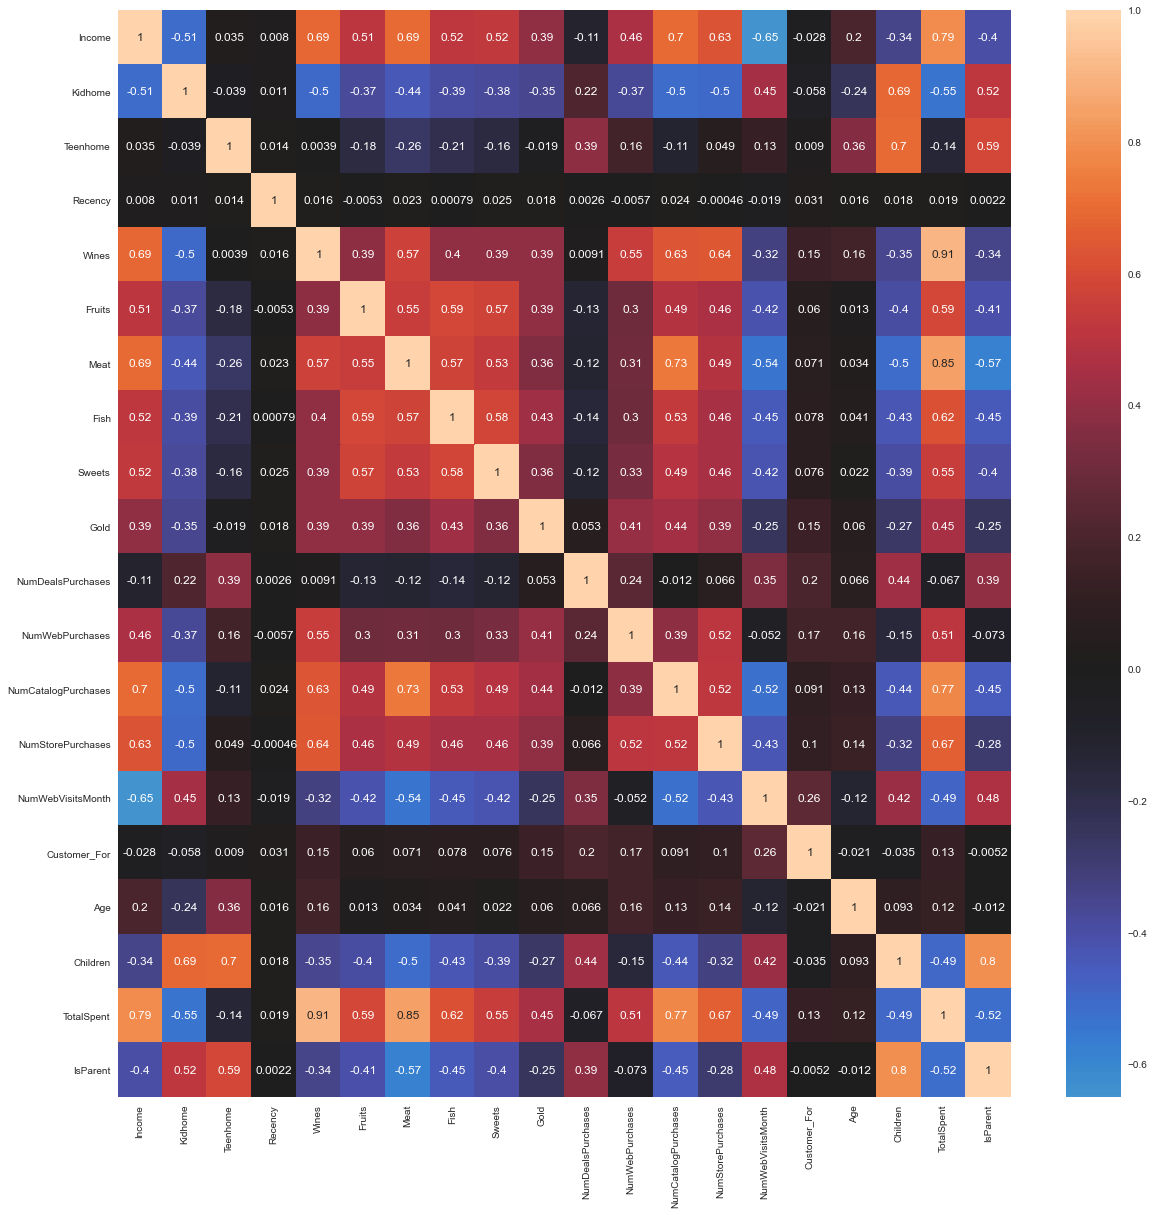

In [13]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

### 3.0 Data Preprocessing

In [14]:
# get the object attributes
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [15]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
#Creating a copy of data    
data_prep = data.copy()    
print("All features are now numerical")

All features are now numerical


In [16]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Marital_Status       2212 non-null   int32  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweets               2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

### 4.0 Data Standardization

In [17]:
#Scaling
scaler = StandardScaler()
scaler.fit(data_prep)
data_scaled = pd.DataFrame(scaler.transform(data_prep),columns= data_prep.columns )
print("All features are now scaled")

All features are now scaled


In [18]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
data_scaled.head()

Dataframe to be used for further modelling:


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Children,TotalSpent,IsParent
0,-0.893586,-1.349603,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,-1.264598,1.635802,-1.581139
1,-0.893586,-1.349603,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,1.404572,-0.933518,0.632456
2,-0.893586,0.740959,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,-1.264598,0.319500,-1.581139
3,-0.893586,0.740959,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,0.069987,-0.888315,0.632456
4,0.571657,0.740959,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,0.069987,-0.282599,0.632456


### 5.0 Dimensionality Reduction

In [19]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [20]:
pca.explained_variance_ratio_

array([3.58457490e-01, 1.18151518e-01, 6.58219844e-02, 5.21708808e-02,
       4.65515196e-02, 4.56584731e-02, 4.30455037e-02, 3.93978079e-02,
       3.48132208e-02, 2.94643397e-02, 2.77302196e-02, 2.49404460e-02,
       2.04328971e-02, 1.95968390e-02, 1.78547135e-02, 1.58534826e-02,
       1.24743603e-02, 1.09420329e-02, 8.77383621e-03, 7.86843470e-03,
       6.47659815e-33, 4.66392373e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

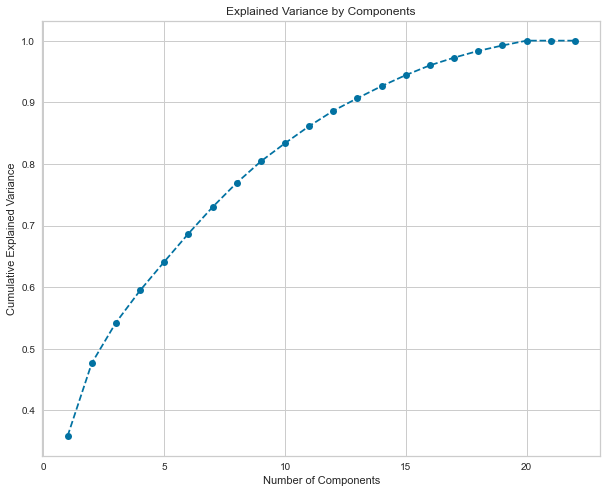

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(1,23), pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [22]:
pca = PCA(n_components=10)
pca.fit(data_scaled)
pca.transform(data_scaled)
data_pca = pca.transform(data_scaled)

### 6.0 Find optimal number of cluster

##### 6.1 Sum of Square Error (SSE)

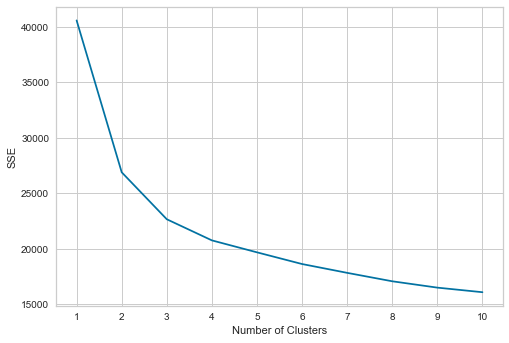

In [23]:
kmeans_kwargs={
    "init":"random",
    "n_init": 10,
    "random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

##### 6.2 Within-Cluster of Sum of Square

In [24]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)


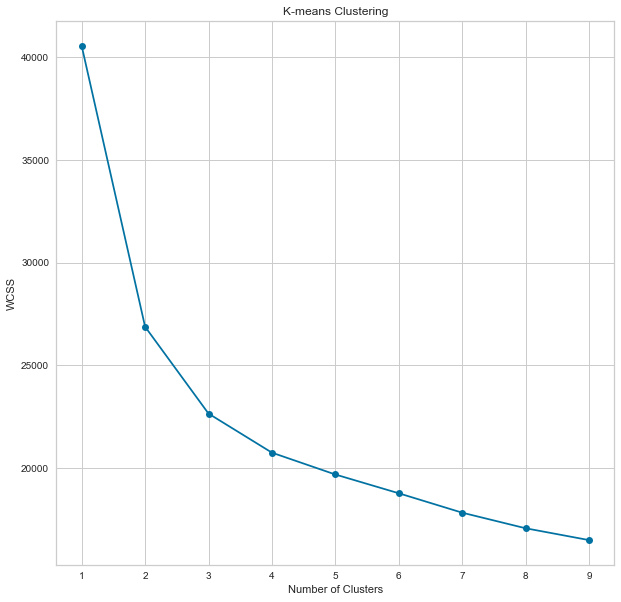

In [25]:
plt.figure(figsize = (10,10))
plt.plot(range(1,10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

##### 6.3 Silhouette

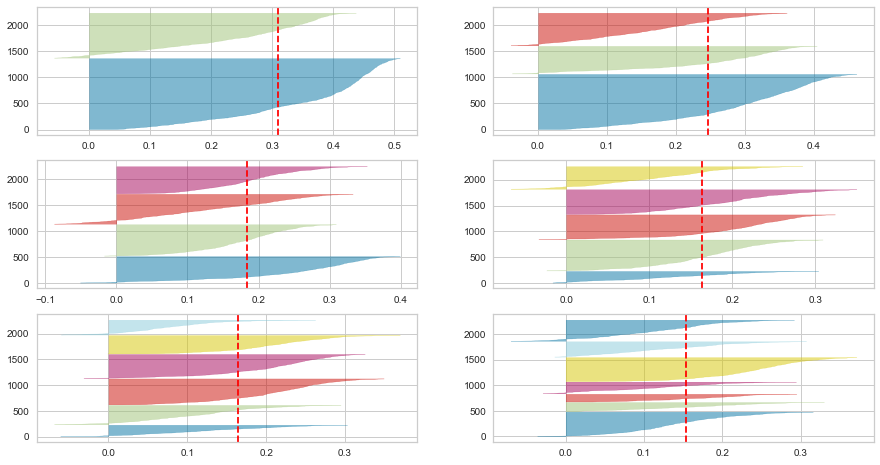

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_pca) 

##### 6.4 Elbow Method

Elbow Method to determine the number of clusters to be formed:


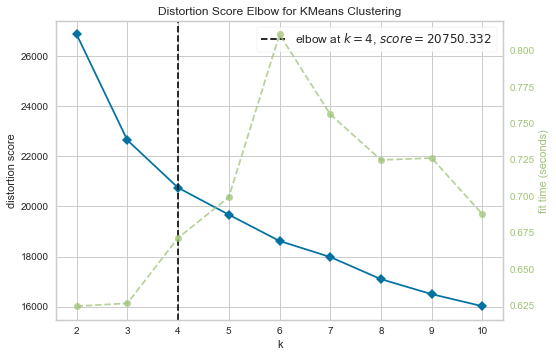

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

### 7.0 Model Building

##### 7.1 Gaussian Mixture Model

In [28]:
gmm = GaussianMixture(n_components=4, random_state=42).fit(data_pca)
gmm_labels = gmm.predict(data_pca)
data_Gaussian_PCA_Cluster = data_prep.copy()
data_Gaussian_PCA_Cluster['Cluster'] = gmm_labels

In [29]:
gmm_score = silhouette_score(data_pca,gmm_labels)
print(gmm_score)

0.1542881179253565


##### 7.2 Density-based Spatial Clustering of Applications with Noise (DBSCAN)

In [30]:
data_pca.shape

(2212, 10)

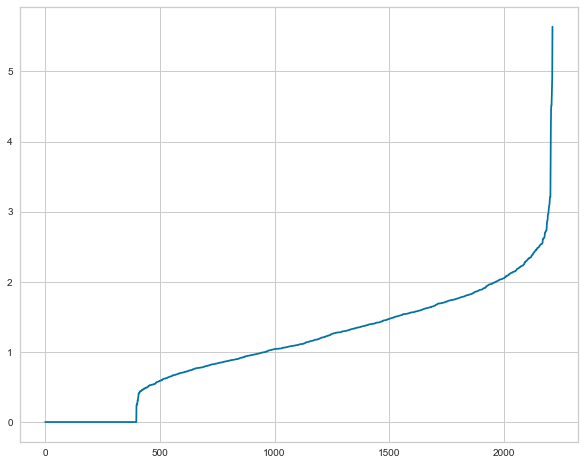

In [31]:
nn = NearestNeighbors(n_neighbors=20).fit(data_pca)
distances, indices= nn.kneighbors(data_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [32]:
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

4.515448979260548


In [33]:
dbscan = DBSCAN (eps=4.52, min_samples=20).fit(data_pca)
dbscan_labels = dbscan.labels_
data_DBSCAN_PCA_Cluster = data_prep.copy()
data_DBSCAN_PCA_Cluster['Cluster'] = dbscan_labels

In [34]:
dbsscan_score = silhouette_score(data_pca,dbscan_labels)
print(dbsscan_score)

0.4612666418050552


##### 7.3 Agglomerative Hierarchical Clustering

In [35]:
#Initiating the Agglomerative Clustering Model
AC = AgglomerativeClustering(n_clusters=4)
#Fit and predict model
AC.fit_predict(data_pca)
#Label model
ac_label = AC.labels_
#Add the Cluster feature to the original dataframe
data_Agglo_PCA_Cluster = data_prep.copy()
data_Agglo_PCA_Cluster['Cluster'] = ac_label

In [36]:
AC_score = silhouette_score(data_pca,ac_label)
print(AC_score)

0.16237615458231458


##### 7.4 KMeans Clustering

In [37]:
#Initiating the KMean Clustering Model
kmeans = KMeans(n_clusters=4, random_state=42)
#Fit model
kmeans.fit(data_pca)
#Predict model
k_labels = kmeans.predict(data_pca)
#Add the Cluster feature to the original dataframe
data_KMean_PCA_Cluster = data_prep.copy()
data_KMean_PCA_Cluster['Cluster'] = k_labels

In [38]:
k_score = silhouette_score(data_pca, k_labels)
print(k_score)

0.18393085424567204


### 8.0 Model Evaluation

In [39]:
for i in [2,3,4,5,6,7]:
    km = KMeans(n_clusters=i)
    km.fit(data_scaled)
    label=km.predict(data_scaled)
    print('Silhoueet Score for cluster:',i,f'{silhouette_score(data_scaled,label)}')

Silhoueet Score for cluster: 2 0.2748861560078049
Silhoueet Score for cluster: 3 0.20865040892909506
Silhoueet Score for cluster: 4 0.14485909462173485
Silhoueet Score for cluster: 5 0.14831701492653784
Silhoueet Score for cluster: 6 0.12569964780157922
Silhoueet Score for cluster: 7 0.1413150812560303


##### 8.1 Gaussian Model

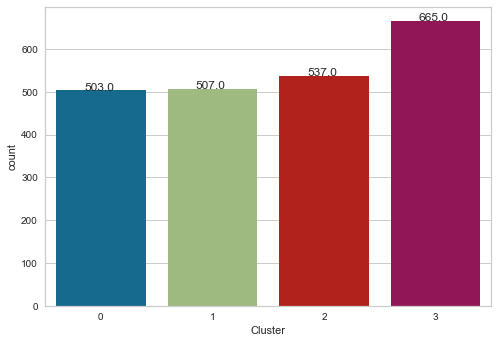

In [40]:
ax = sns.countplot(x=data_Gaussian_PCA_Cluster['Cluster'], data=data_Gaussian_PCA_Cluster)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 8.2 Density-based Spatial Clustering of Applications with Noise (DBSCAN) Model 

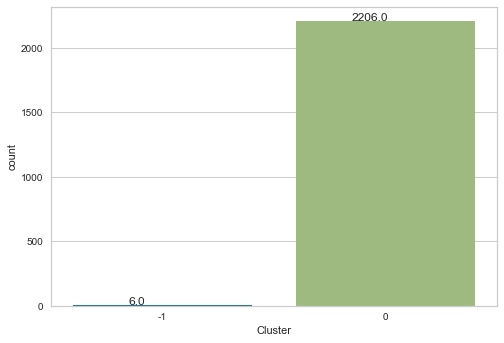

In [41]:
ax = sns.countplot(x=data_DBSCAN_PCA_Cluster['Cluster'], data=data_DBSCAN_PCA_Cluster)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 8.3 Agglomerative Hierarchical Model 

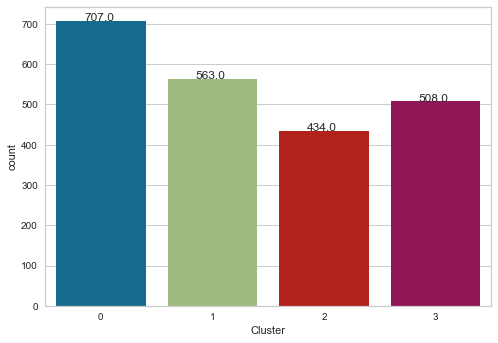

In [42]:
ax = sns.countplot(x=data_Agglo_PCA_Cluster['Cluster'], data=data_Agglo_PCA_Cluster)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 8.4 K-Means Model

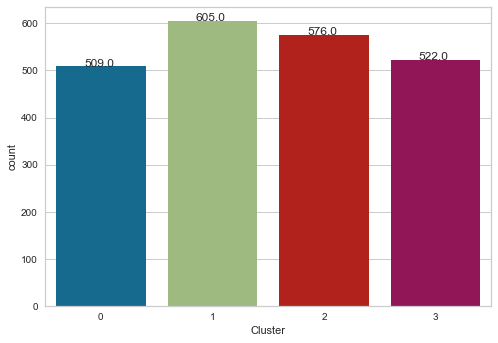

In [43]:
ax = sns.countplot(x=data_KMean_PCA_Cluster['Cluster'], data=data_KMean_PCA_Cluster)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

### 9.0 Profiling

In [44]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Marital_Status       2212 non-null   int32  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweets               2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

##### 9.1 Gaussian Model

##### 9.1.1 Demograhic Segmentation

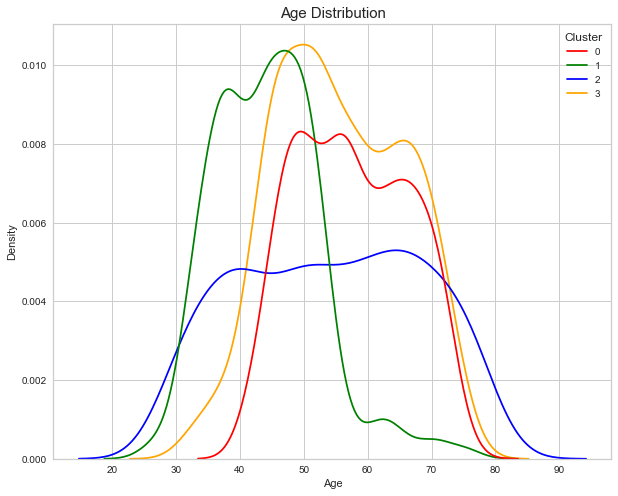

In [45]:
pal=['red','green','blue','orange']
plt.figure(figsize = (10,8) )
sns.kdeplot(data =data_Gaussian_PCA_Cluster, x = 'Age' , hue = 'Cluster' , palette=pal)
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

In [46]:
clus0 = data_Gaussian_PCA_Cluster[(data_Gaussian_PCA_Cluster['Age'] > 55 )&(data_Gaussian_PCA_Cluster['Cluster'] == 0)]
clus1 = data_Gaussian_PCA_Cluster[(data_Gaussian_PCA_Cluster['Age'] > 55 )&(data_Gaussian_PCA_Cluster['Cluster'] == 1)]
clus2 = data_Gaussian_PCA_Cluster[(data_Gaussian_PCA_Cluster['Age'] > 55 )&(data_Gaussian_PCA_Cluster['Cluster'] == 2)]
clus3 = data_Gaussian_PCA_Cluster[(data_Gaussian_PCA_Cluster['Age'] > 55 )&(data_Gaussian_PCA_Cluster['Cluster'] == 3)]
print('percentage of customer more than 55 at cluster0 : {0:0.2f}%'.format(len(clus0) / len(data_Gaussian_PCA_Cluster[data_Gaussian_PCA_Cluster['Cluster'] == 0] )))
print('percentage of customer more than 55 at cluster1 : {0:0.2f}%'.format(len(clus1) / len(data_Gaussian_PCA_Cluster[data_Gaussian_PCA_Cluster['Cluster'] == 1])))
print('percentage of customer more than 55 at cluster2 : {0:0.2f}%'.format(len(clus1) / len(data_Gaussian_PCA_Cluster[data_Gaussian_PCA_Cluster['Cluster'] == 2])))
print('percentage of customer more than 55 at cluster3 : {0:0.2f}%'.format(len(clus1) / len(data_Gaussian_PCA_Cluster[data_Gaussian_PCA_Cluster['Cluster'] == 3])))

percentage of customer more than 55 at cluster0 : 0.57%
percentage of customer more than 55 at cluster1 : 0.06%
percentage of customer more than 55 at cluster2 : 0.06%
percentage of customer more than 55 at cluster3 : 0.05%


<Figure size 576x396 with 0 Axes>

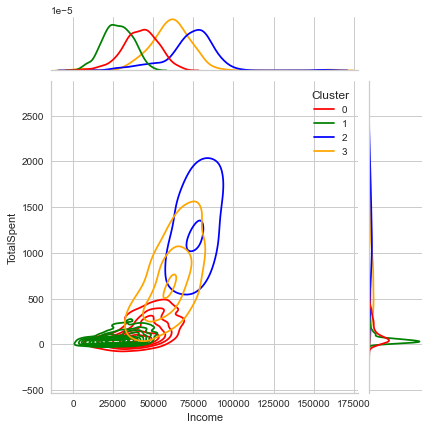

In [47]:
pal=['red','green','blue','orange']
plt.figure()
sns.jointplot(x=data_Gaussian_PCA_Cluster['Income'], y=data_Gaussian_PCA_Cluster["TotalSpent"], hue =data_Gaussian_PCA_Cluster["Cluster"], kind="kde", palette=pal)
plt.show()

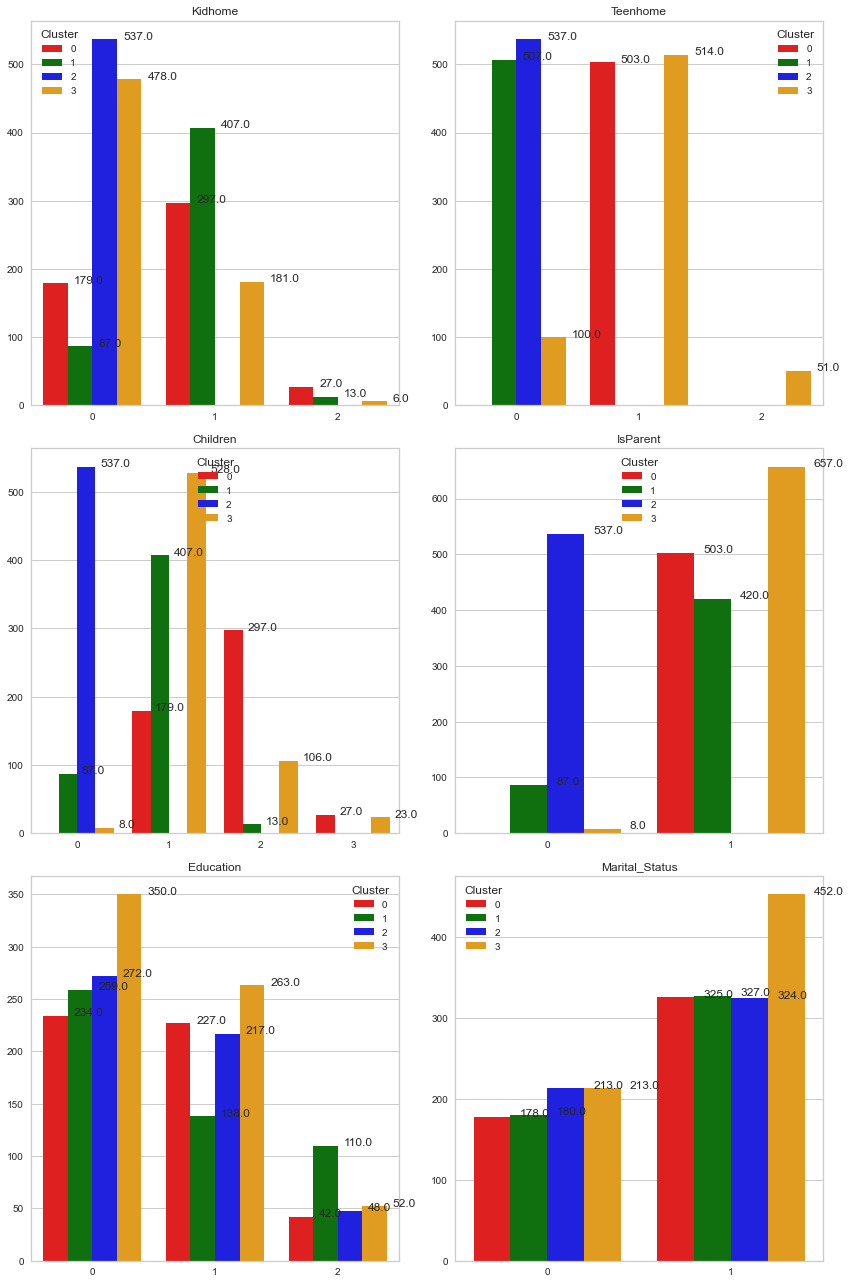

In [48]:
pal = ['red', 'green', 'blue', 'orange']
Personal = ['Kidhome', 'Teenhome', 'Children', 'IsParent', 'Education', 'Marital_Status']

fig = plt.figure(figsize=(12, 18))

for i in range(1, 7):
    ax = plt.subplot(3, 2, i)
    sns.countplot(x=data_Gaussian_PCA_Cluster[Personal[i-1]], data=data_Gaussian_PCA_Cluster, hue='Cluster', palette=pal, ax=ax)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(Personal[i-1])

plt.tight_layout()
plt.show()


##### 9.1.2 Behavioral Segmentation

<Figure size 576x396 with 0 Axes>

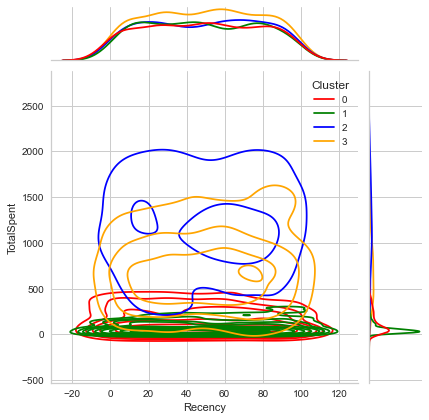

<Figure size 576x396 with 0 Axes>

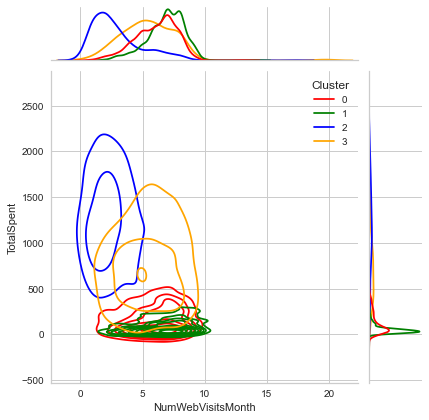

<Figure size 576x396 with 0 Axes>

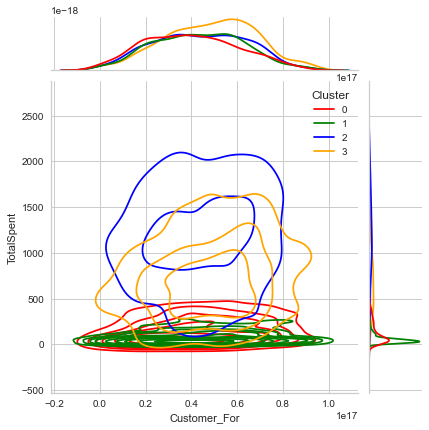

In [49]:
Personal = ['Recency','NumWebVisitsMonth','Customer_For']
pal=['red','green','blue','orange']
for i in Personal:
    plt.figure()
    sns.jointplot(x=data_Gaussian_PCA_Cluster[i], y=data_Gaussian_PCA_Cluster["TotalSpent"], hue =data_Gaussian_PCA_Cluster["Cluster"], kind="kde", palette=pal)
    plt.show()

##### 9.1.3 Psychographic Segmentation

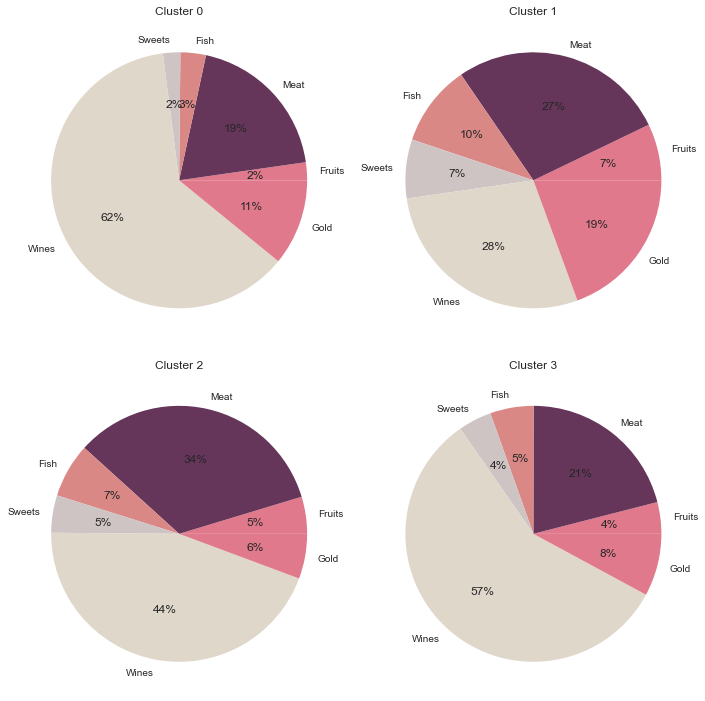

In [50]:
labels = ['Fruits' , 'Meat' , 'Fish' , 'Sweets' , 'Wines' , 'Gold']
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
fig, axes = plt.subplots(2, 2, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    counts =[]
    d = data_Gaussian_PCA_Cluster[data_Gaussian_PCA_Cluster['Cluster'] == i]
    counts.append(d['Fruits'].sum())
    counts.append(d['Meat'].sum())    
    counts.append(d['Fish'].sum())    
    counts.append(d['Sweets'].sum())    
    counts.append(d['Wines'].sum())
    counts.append(d['Gold'].sum())
    ax.set_title("Cluster "+str(i))
    ax.pie(counts, labels = labels, autopct='%.0f%%' ,colors=colors_nude)

plt.tight_layout()
plt.show()


##### 9.1.4 Value-based Segmentation

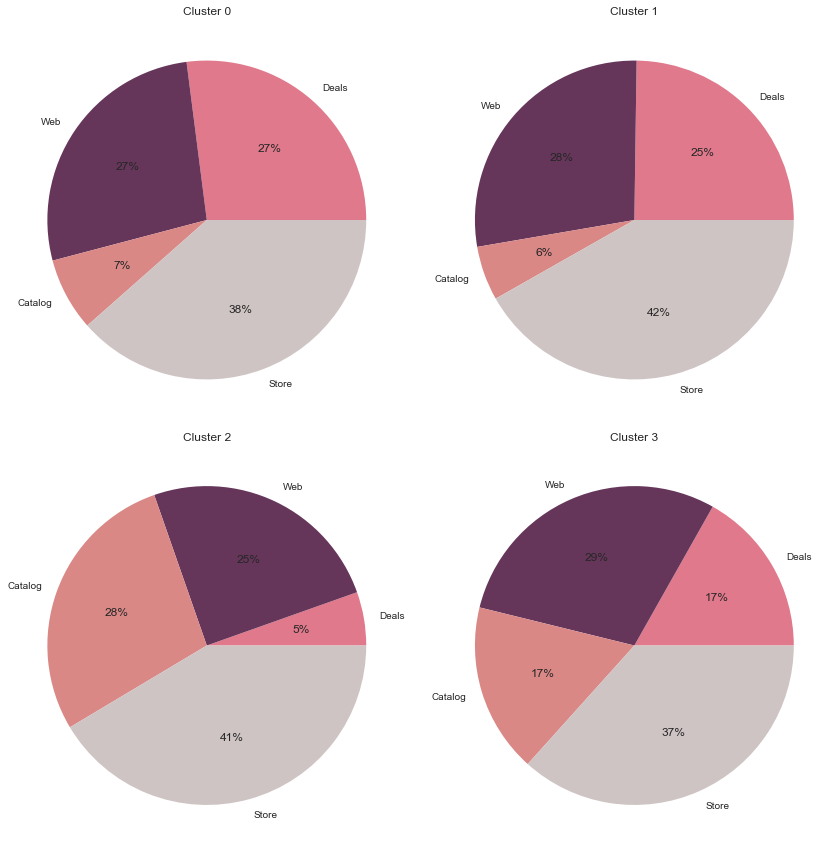

In [51]:
labels = ['Deals','Web','Catalog','Store']
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    counts = []
    d = data_Gaussian_PCA_Cluster[data_Gaussian_PCA_Cluster['Cluster'] == i]
    counts.append(d['NumDealsPurchases'].sum())
    counts.append(d['NumWebPurchases'].sum())    
    counts.append(d['NumCatalogPurchases'].sum())    
    counts.append(d['NumStorePurchases'].sum())    
    ax.set_title("Cluster "+str(i))
    ax.pie(counts, labels=labels, autopct='%1.0f%%', colors=colors_nude)

plt.tight_layout()
plt.show()


##### 9.2 Agglomerative Hierarchical Model

##### 9.2.1 Demograhic Segmentation

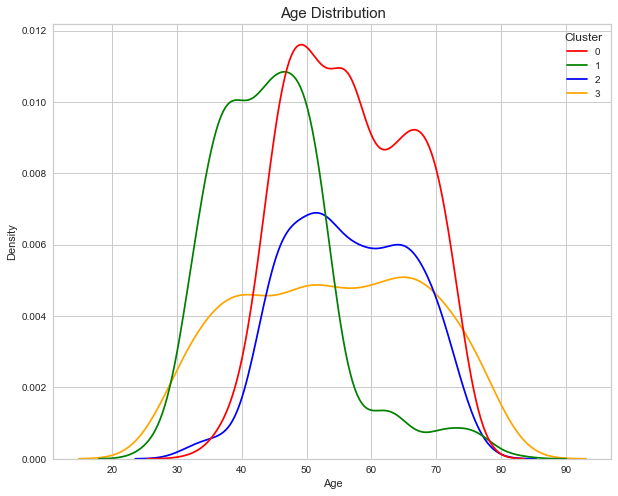

In [52]:
pal=['red','green','blue','orange']
plt.figure(figsize = (10,8) )
sns.kdeplot(data =data_Agglo_PCA_Cluster, x = 'Age' , hue = 'Cluster' , palette=pal)
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

In [53]:
clus0 = data_Agglo_PCA_Cluster[(data_Agglo_PCA_Cluster['Age'] > 55 )&(data_Agglo_PCA_Cluster['Cluster'] == 0)]
clus1 = data_Agglo_PCA_Cluster[(data_Agglo_PCA_Cluster['Age'] > 55 )&(data_Agglo_PCA_Cluster['Cluster'] == 1)]
clus2 = data_Agglo_PCA_Cluster[(data_Agglo_PCA_Cluster['Age'] > 55 )&(data_Agglo_PCA_Cluster['Cluster'] == 2)]
clus3 = data_Agglo_PCA_Cluster[(data_Agglo_PCA_Cluster['Age'] > 55 )&(data_Agglo_PCA_Cluster['Cluster'] == 3)]
print('percentage of customer more than 55 at cluster0 : {0:0.2f}%'.format(len(clus0) / len(data_Agglo_PCA_Cluster[data_Agglo_PCA_Cluster['Cluster'] == 0] )))
print('percentage of customer more than 55 at cluster1 : {0:0.2f}%'.format(len(clus1) / len(data_Agglo_PCA_Cluster[data_Agglo_PCA_Cluster['Cluster'] == 1])))
print('percentage of customer more than 55 at cluster2 : {0:0.2f}%'.format(len(clus1) / len(data_Agglo_PCA_Cluster[data_Agglo_PCA_Cluster['Cluster'] == 2])))
print('percentage of customer more than 55 at cluster3 : {0:0.2f}%'.format(len(clus1) / len(data_Agglo_PCA_Cluster[data_Agglo_PCA_Cluster['Cluster'] == 3])))

percentage of customer more than 55 at cluster0 : 0.53%
percentage of customer more than 55 at cluster1 : 0.09%
percentage of customer more than 55 at cluster2 : 0.12%
percentage of customer more than 55 at cluster3 : 0.10%


<Figure size 576x396 with 0 Axes>

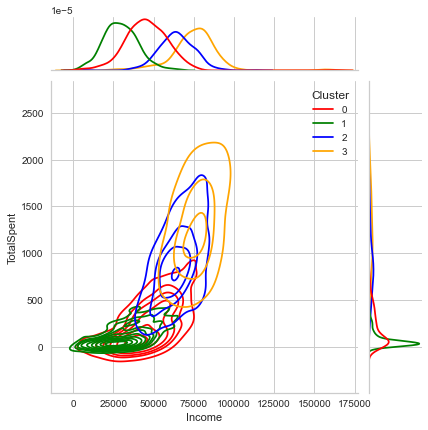

In [54]:
pal=['red','green','blue','orange']
plt.figure()
sns.jointplot(x=data_Agglo_PCA_Cluster['Income'], y=data_Agglo_PCA_Cluster["TotalSpent"], hue =data_Agglo_PCA_Cluster["Cluster"], kind="kde", palette=pal)
plt.show()

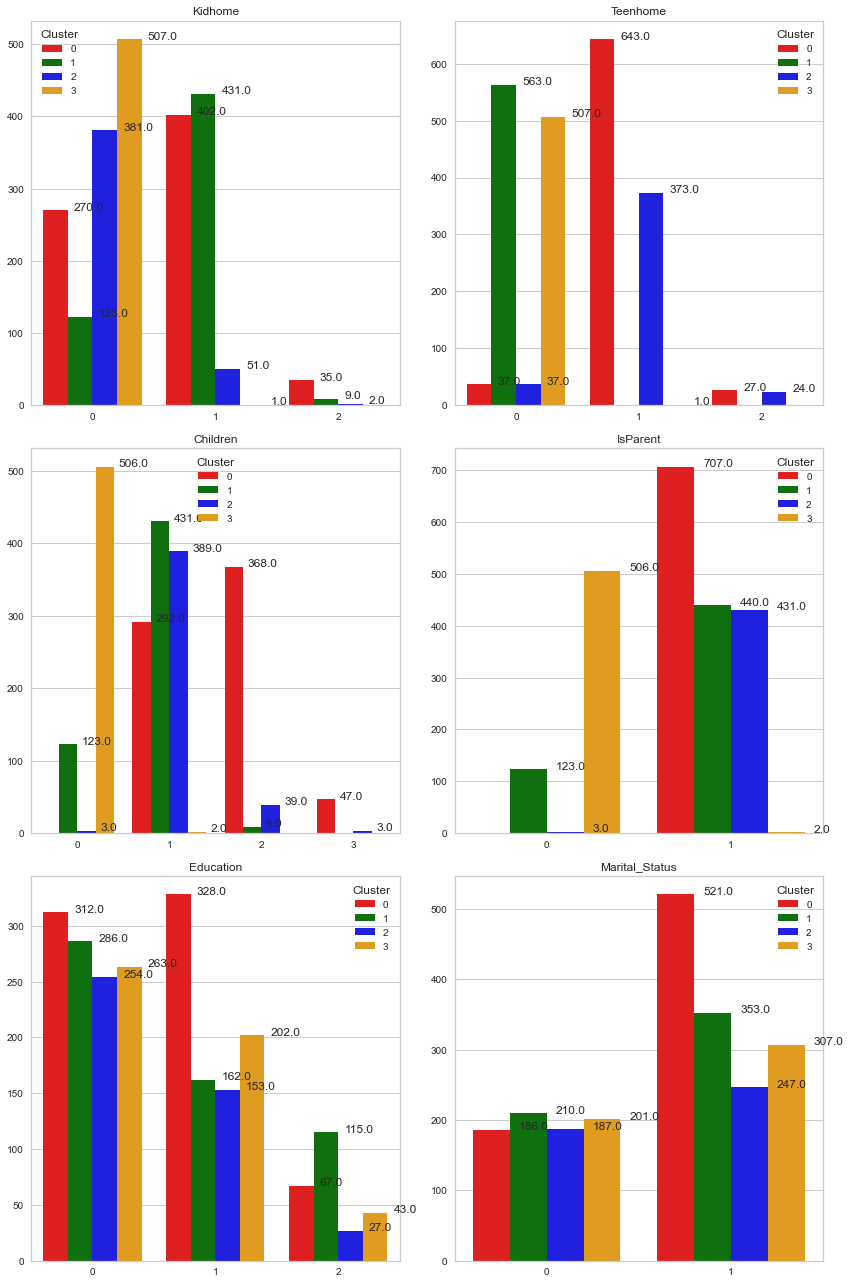

In [55]:
pal = ['red', 'green', 'blue', 'orange']
Personal = ['Kidhome', 'Teenhome', 'Children', 'IsParent', 'Education', 'Marital_Status']

fig = plt.figure(figsize=(12, 18))

for i in range(1, 7):
    ax = plt.subplot(3, 2, i)
    sns.countplot(x=data_Agglo_PCA_Cluster[Personal[i-1]], data=data_Agglo_PCA_Cluster, hue='Cluster', palette=pal, ax=ax)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(Personal[i-1])

plt.tight_layout()
plt.show()


##### 9.2.2 Behavioral Segmentation

<Figure size 576x396 with 0 Axes>

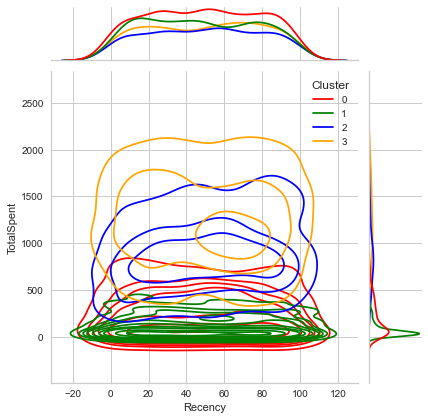

<Figure size 576x396 with 0 Axes>

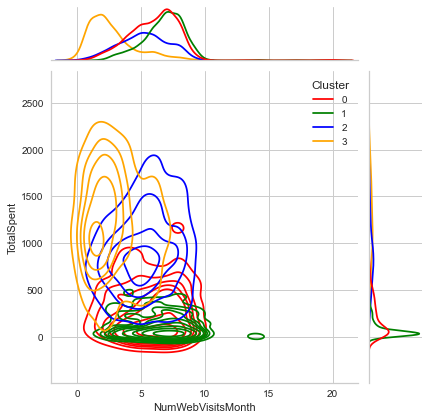

<Figure size 576x396 with 0 Axes>

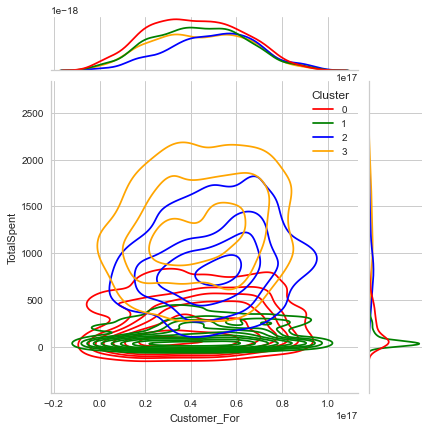

In [56]:
Personal = ['Recency','NumWebVisitsMonth','Customer_For']
pal=['red','green','blue','orange']
for i in Personal:
    plt.figure()
    sns.jointplot(x=data_Agglo_PCA_Cluster[i], y=data_Agglo_PCA_Cluster["TotalSpent"], hue =data_Agglo_PCA_Cluster["Cluster"], kind="kde", palette=pal)
    plt.show()

##### 9.2.3 Psychographic Segmentation

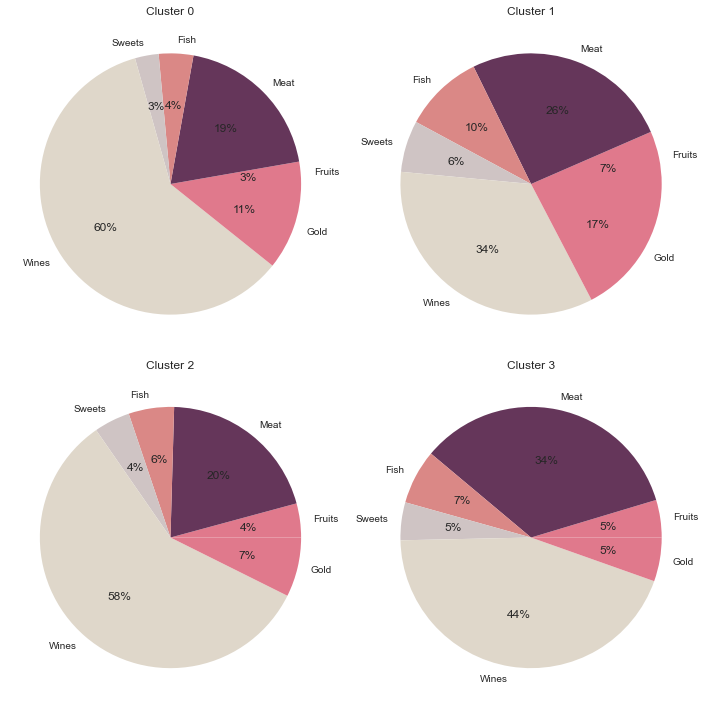

In [57]:
labels = ['Fruits' , 'Meat' , 'Fish' , 'Sweets' , 'Wines' , 'Gold']
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
fig, axes = plt.subplots(2, 2, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    counts =[]
    d = data_Agglo_PCA_Cluster[data_Agglo_PCA_Cluster['Cluster'] == i]
    counts.append(d['Fruits'].sum())
    counts.append(d['Meat'].sum())    
    counts.append(d['Fish'].sum())    
    counts.append(d['Sweets'].sum())    
    counts.append(d['Wines'].sum())
    counts.append(d['Gold'].sum())
    ax.set_title("Cluster "+str(i))
    ax.pie(counts, labels = labels, autopct='%.0f%%' ,colors=colors_nude)

plt.tight_layout()
plt.show()


##### 9.2.4 Value-based Segmentation

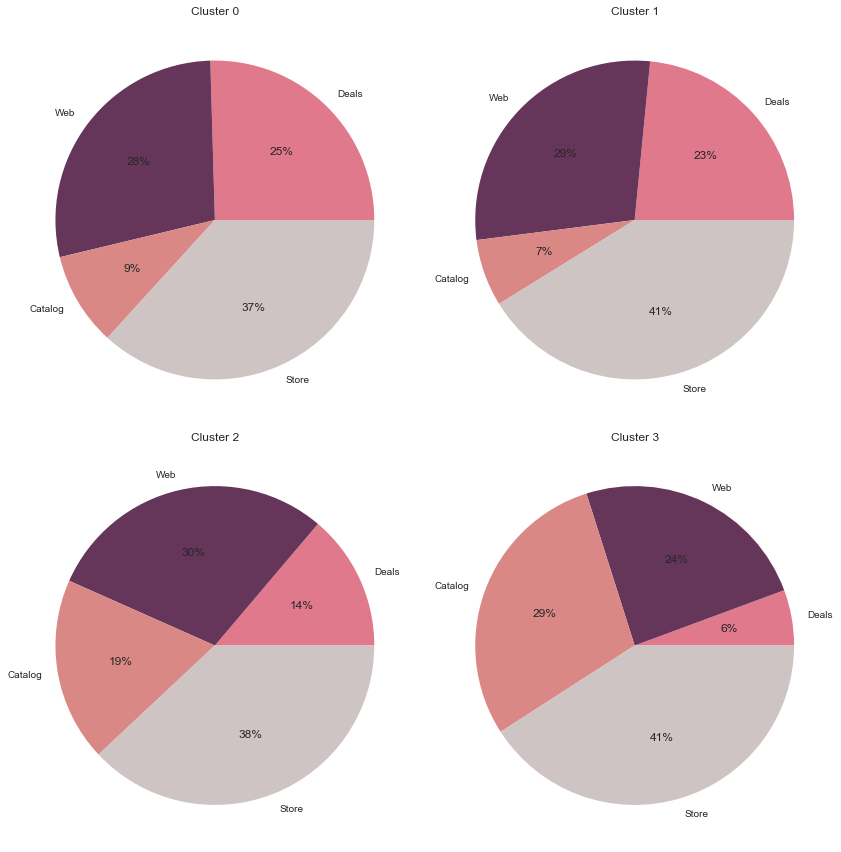

In [58]:
labels = ['Deals','Web','Catalog','Store']
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    counts = []
    d = data_Agglo_PCA_Cluster[data_Agglo_PCA_Cluster['Cluster'] == i]
    counts.append(d['NumDealsPurchases'].sum())
    counts.append(d['NumWebPurchases'].sum())    
    counts.append(d['NumCatalogPurchases'].sum())    
    counts.append(d['NumStorePurchases'].sum())    
    ax.set_title("Cluster "+str(i))
    ax.pie(counts, labels=labels, autopct='%1.0f%%', colors=colors_nude)

plt.tight_layout()
plt.show()


##### 9.3 K-Means Model

##### 9.3.1 Demograhic Segmentation

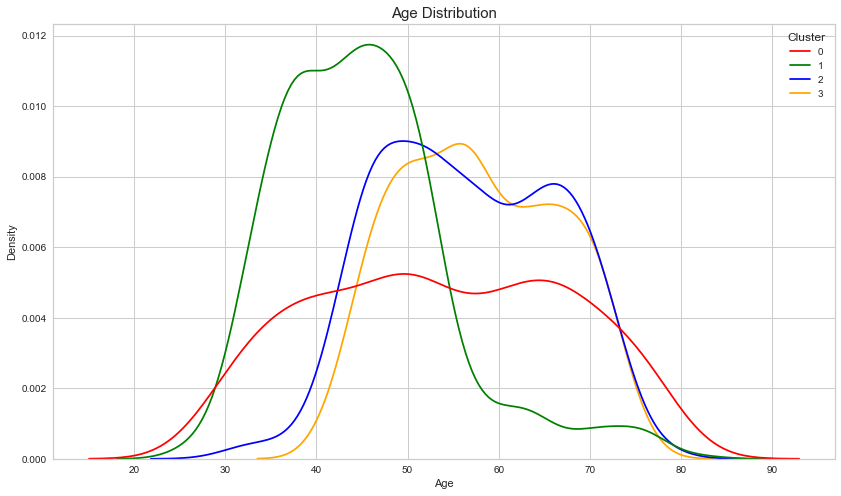

In [59]:
pal=['red','green','blue','orange']
plt.figure(figsize = (14,8) )
sns.kdeplot(data =data_KMean_PCA_Cluster, x = 'Age' , hue = 'Cluster' , palette=pal)
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

In [60]:
clus0 = data_KMean_PCA_Cluster[(data_KMean_PCA_Cluster['Age'] > 55 )&(data_KMean_PCA_Cluster['Cluster'] == 0)]
clus1 = data_KMean_PCA_Cluster[(data_KMean_PCA_Cluster['Age'] > 55 )&(data_KMean_PCA_Cluster['Cluster'] == 1)]
clus2 = data_KMean_PCA_Cluster[(data_KMean_PCA_Cluster['Age'] > 55 )&(data_KMean_PCA_Cluster['Cluster'] == 2)]
clus3 = data_KMean_PCA_Cluster[(data_KMean_PCA_Cluster['Age'] > 55 )&(data_KMean_PCA_Cluster['Cluster'] == 3)]
print('percentage of customer more than 55 at cluster0 : {0:0.2f}%'.format(len(clus0) / len(data_KMean_PCA_Cluster[data_KMean_PCA_Cluster['Cluster'] == 0] )))
print('percentage of customer more than 55 at cluster1 : {0:0.2f}%'.format(len(clus1) / len(data_KMean_PCA_Cluster[data_KMean_PCA_Cluster['Cluster'] == 1])))
print('percentage of customer more than 55 at cluster2 : {0:0.2f}%'.format(len(clus1) / len(data_KMean_PCA_Cluster[data_KMean_PCA_Cluster['Cluster'] == 2])))
print('percentage of customer more than 55 at cluster3 : {0:0.2f}%'.format(len(clus1) / len(data_KMean_PCA_Cluster[data_KMean_PCA_Cluster['Cluster'] == 3])))

percentage of customer more than 55 at cluster0 : 0.46%
percentage of customer more than 55 at cluster1 : 0.10%
percentage of customer more than 55 at cluster2 : 0.10%
percentage of customer more than 55 at cluster3 : 0.11%


<Figure size 576x396 with 0 Axes>

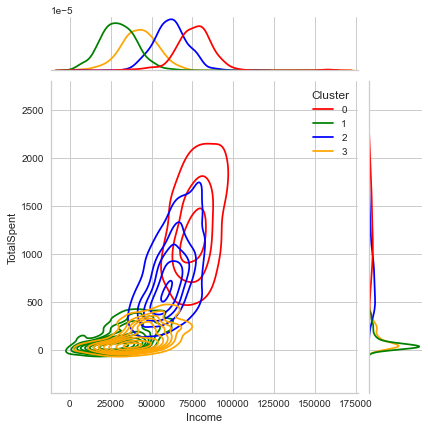

In [61]:
pal=['red','green','blue','orange']
plt.figure()
sns.jointplot(x=data_KMean_PCA_Cluster['Income'], y=data_KMean_PCA_Cluster["TotalSpent"], hue =data_KMean_PCA_Cluster["Cluster"], kind="kde", palette=pal)
plt.show()

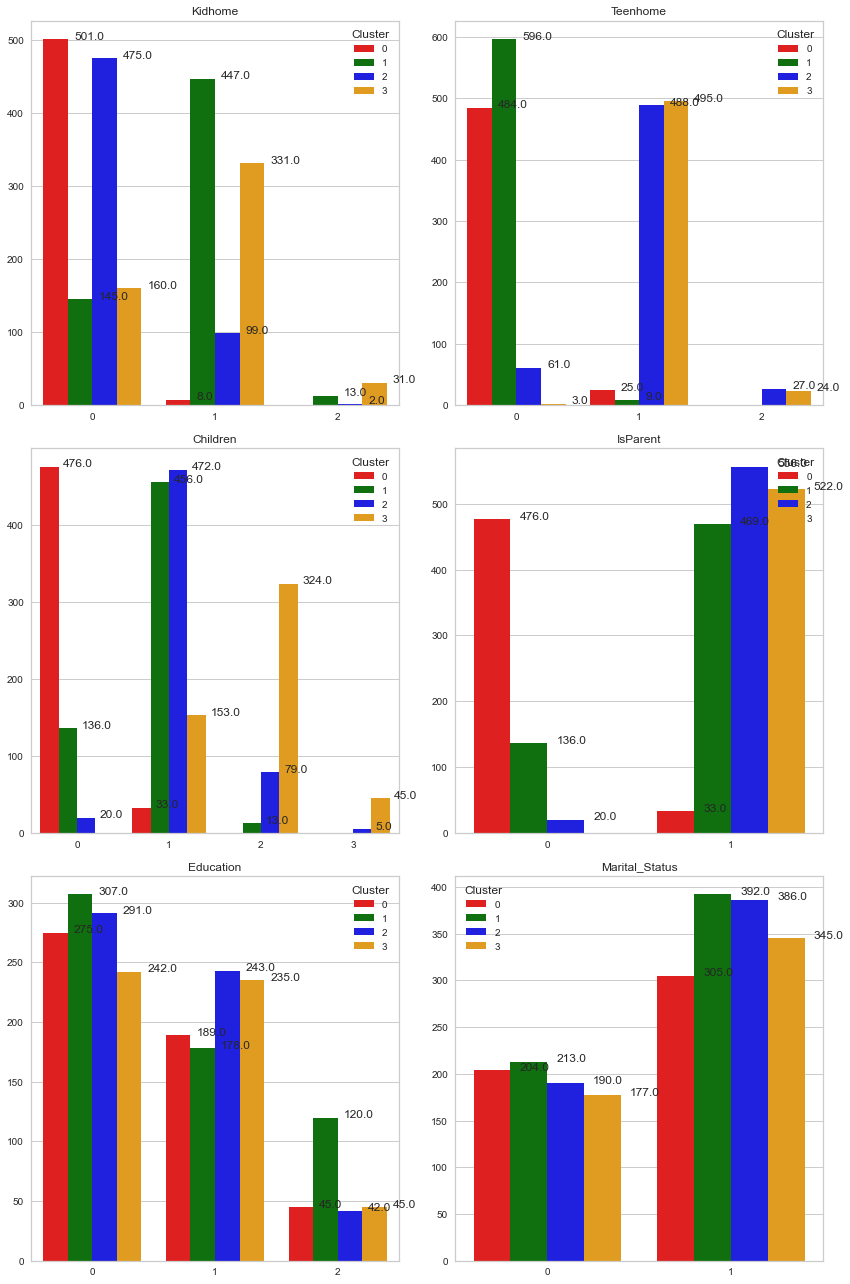

In [62]:
pal = ['red', 'green', 'blue', 'orange']
Personal = ['Kidhome', 'Teenhome', 'Children', 'IsParent', 'Education', 'Marital_Status']

fig = plt.figure(figsize=(12, 18))

for i in range(1, 7):
    ax = plt.subplot(3, 2, i)
    sns.countplot(x=data_KMean_PCA_Cluster[Personal[i-1]], data=data_KMean_PCA_Cluster, hue='Cluster', palette=pal, ax=ax)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(Personal[i-1])

plt.tight_layout()
plt.show()


##### 9.3.2 Behavioral Segmentation

<Figure size 576x396 with 0 Axes>

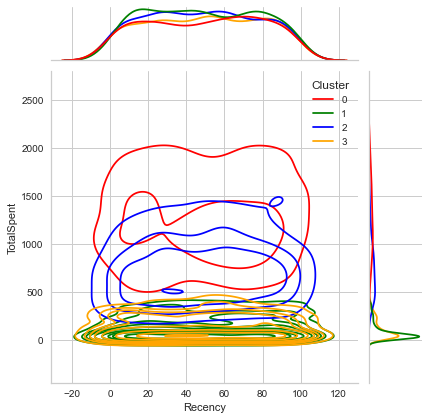

<Figure size 576x396 with 0 Axes>

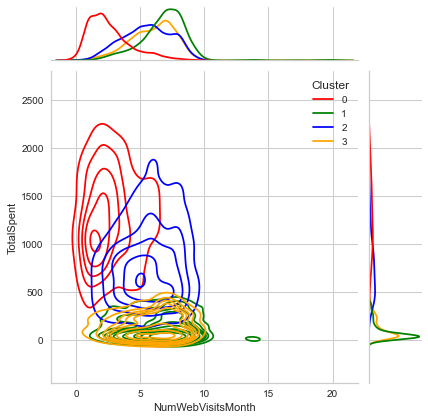

<Figure size 576x396 with 0 Axes>

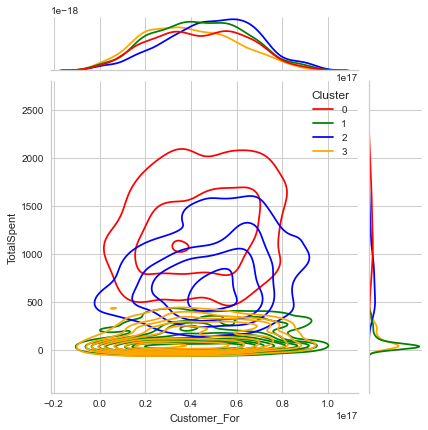

In [63]:
Personal = ['Recency','NumWebVisitsMonth','Customer_For']
pal=['red','green','blue','orange']
for i in Personal:
    plt.figure()
    sns.jointplot(x=data_KMean_PCA_Cluster[i], y=data_KMean_PCA_Cluster["TotalSpent"], hue =data_KMean_PCA_Cluster["Cluster"], kind="kde", palette=pal)
    plt.show()

##### 9.3.3 Psychographic Segmentation

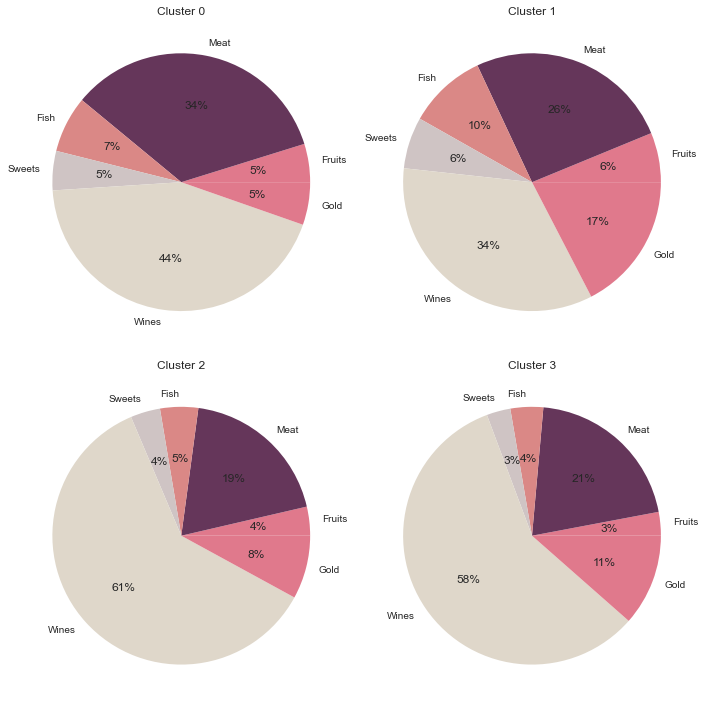

In [64]:
labels = ['Fruits' , 'Meat' , 'Fish' , 'Sweets' , 'Wines' , 'Gold']
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
fig, axes = plt.subplots(2, 2, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    counts =[]
    d = data_KMean_PCA_Cluster[data_KMean_PCA_Cluster['Cluster'] == i]
    counts.append(d['Fruits'].sum())
    counts.append(d['Meat'].sum())    
    counts.append(d['Fish'].sum())    
    counts.append(d['Sweets'].sum())    
    counts.append(d['Wines'].sum())
    counts.append(d['Gold'].sum())
    ax.set_title("Cluster "+str(i))
    ax.pie(counts, labels = labels, autopct='%.0f%%' ,colors=colors_nude)

plt.tight_layout()
plt.show()


##### 9.3.4 Value-based Segmentation

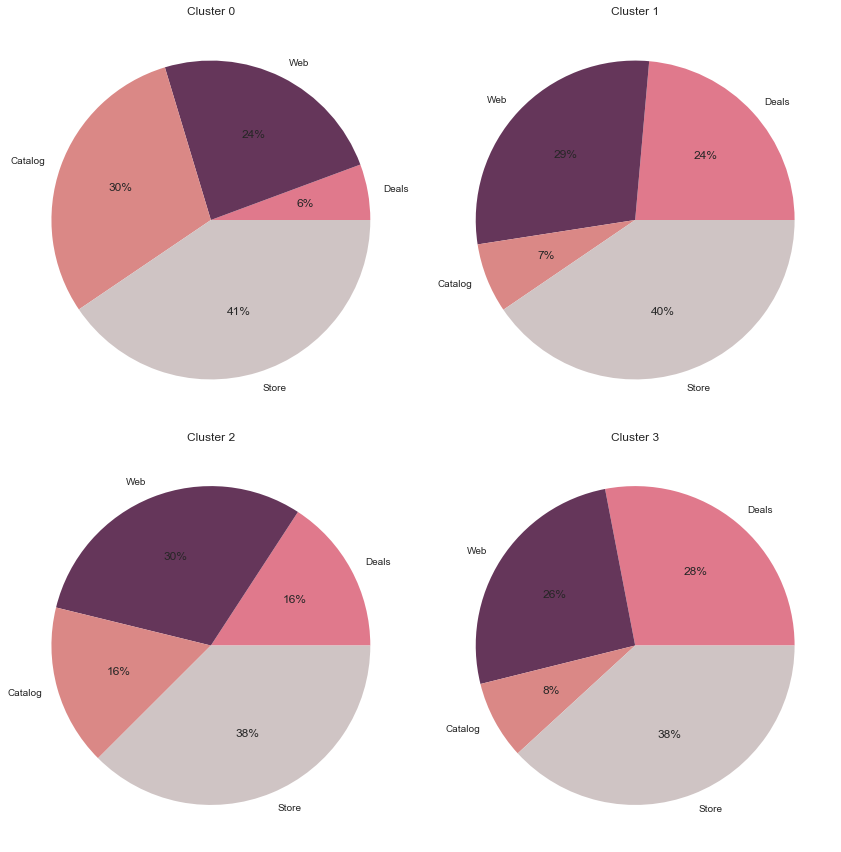

In [65]:
labels = ['Deals','Web','Catalog','Store']
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    counts = []
    d = data_KMean_PCA_Cluster[data_KMean_PCA_Cluster['Cluster'] == i]
    counts.append(d['NumDealsPurchases'].sum())
    counts.append(d['NumWebPurchases'].sum())    
    counts.append(d['NumCatalogPurchases'].sum())    
    counts.append(d['NumStorePurchases'].sum())    
    ax.set_title("Cluster "+str(i))
    ax.pie(counts, labels=labels, autopct='%1.0f%%', colors=colors_nude)

plt.tight_layout()
plt.show()
